# Model to predict salary bracket for tech workers

In [1]:
# look at notes from ZTM gh to annotate
# should we do classifier or regression model?
# given parameters about a perspn, can we determine which salary bracket they belong in?

# what accuracy do we need?
# speed may be more important than accuracy if we're a social networking site
# mention that we split data and deleted non us, better for speed and we're a US focused company

# ideas
# big city? boolean data pt, or fortune 500 company? data point
### use data analysis to make sure theyre related if you add them
# remove outliers
# switch to regression
# random search and grid search
# change random seed
# put all code in vscode with copilot at the end for pep8 etc suggestions
# add graphs throughout like while exploring data to make communicative visuals (plot columns against target, etc.)
# rewrite everything obviosuyl
# does location matter? big city instead?
# you can use salary brackets just for data visualization purpose
# calculate mean salary for each job, for each education, city etc.
## if job matters, you can have a column that says engineer? or manager?


# steps
# change data set to be bracket-based and resave either into new csv or dataframe
# clean data if necessary
# make data numeric if you want
# shuffle and split data
# model and fit data
# evaluate and tune

In [2]:
import numpy as np
import pandas as pd
import seaborn as seaborn
import matplotlib.pyplot as plt
# make visualizations appear inside notebook
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, mean_squared_log_error, mean_absolute_error, r2_score, plot_roc_curve


In [3]:
df = pd.read_csv("./data/Levels_Fyi_Salary_Data_edited.csv")
df

,company,level,title,annualcomp,location,yearsofexperience,yearsatcompany,cityid,dmaid,education
0,Facebook,E9,Product Manager,4980000,"Menlo Park, CA",17.0,0.0,7300,807.0,Master's Degree
1,Microsoft,80,Software Engineering Manager,4950000,"Redmond, WA",24.0,8.0,11521,819.0,NaN
2,Google,L10,Product Manager,4500000,"San Francisco, CA",20.0,14.0,7419,807.0,Master's Degree
3,Facebook,E9,Software Engineer,4490000,"Menlo Park, CA",13.0,9.0,7300,807.0,NaN
4,Snap,L8,Software Engineering Manager,2500000,"Los Angeles, CA",20.0,4.0,7275,803.0,NaN
...,...,...,...,...,...,...,...,...,...,...
62637,Tata Consultancy Services,L1,Software Engineer,10000,"Noida, UP, India",2.0,2.0,42631,0.0,Bachelor's Degree
62638,Xendit,L3,Software Engineer,10000,"Jakarta, JK, Indonesia",1.0,1.0,4010,0.0,Bachelor's Degree
62639,Manhattan Associates,Software Engineer,Software Engineer,10000,"Bangalore, KA, India",4.0,4.0,4058,0.0,Bachelor's Degree
62640,Infosys,L4,Software Engineer,10000,"Pune, MH, India",6.0,4.0,4062,0.0,Bachelor's Degree


In [4]:
df = df.drop("cityid", axis=1)
df

,company,level,title,annualcomp,location,yearsofexperience,yearsatcompany,dmaid,education
0,Facebook,E9,Product Manager,4980000,"Menlo Park, CA",17.0,0.0,807.0,Master's Degree
1,Microsoft,80,Software Engineering Manager,4950000,"Redmond, WA",24.0,8.0,819.0,NaN
2,Google,L10,Product Manager,4500000,"San Francisco, CA",20.0,14.0,807.0,Master's Degree
3,Facebook,E9,Software Engineer,4490000,"Menlo Park, CA",13.0,9.0,807.0,NaN
4,Snap,L8,Software Engineering Manager,2500000,"Los Angeles, CA",20.0,4.0,803.0,NaN
...,...,...,...,...,...,...,...,...,...
62637,Tata Consultancy Services,L1,Software Engineer,10000,"Noida, UP, India",2.0,2.0,0.0,Bachelor's Degree
62638,Xendit,L3,Software Engineer,10000,"Jakarta, JK, Indonesia",1.0,1.0,0.0,Bachelor's Degree
62639,Manhattan Associates,Software Engineer,Software Engineer,10000,"Bangalore, KA, India",4.0,4.0,0.0,Bachelor's Degree
62640,Infosys,L4,Software Engineer,10000,"Pune, MH, India",6.0,4.0,0.0,Bachelor's Degree


In [5]:
# do a grpah here or somehting idk. comapre two columns as x and y
# look for trends
# exploratory data analysis
# df_bracketed

In [6]:
# explore the data idk e=whatever
# then do some feature engineering

#crosstab
# maybe create salary brackets just for data visualization
# create other parts of df like big city? etc. for data visualization
# maybe 2 plots: years experience at a job and years experience in genral plotted against salary

In [7]:
# convert string columns to categories 
# assigns a numerical value to each category
#df['company'] = df['company'].astype("category").cat.as_ordered()
#df['title'] = df['title'].astype("category").cat.as_ordered()
#df['location'] = df['location'].astype("category").cat.as_ordered()
#df['education'] = df['education'].astype("category").cat.as_ordered()
#df

<AxesSubplot:xlabel='title'>

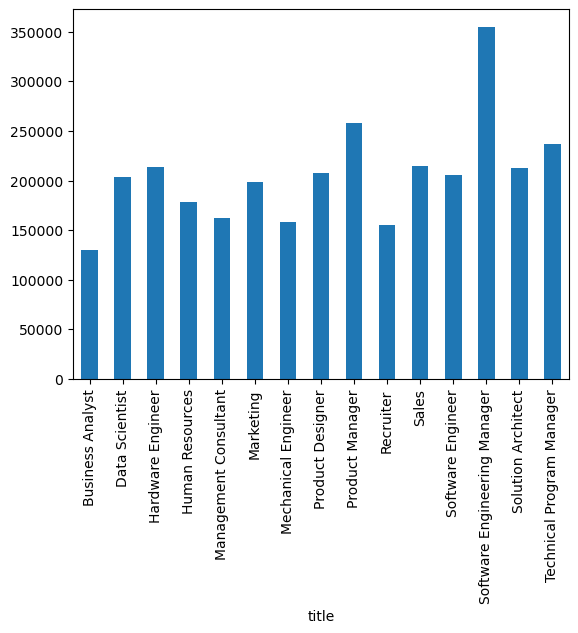

In [8]:
# add bracket for high paying tech careers according to https://www.simplilearn.com/highest-paying-tech-jobs-article or according to mean top paying
# mean pay for each title

df_means_by_title = df.groupby('title')['annualcomp'].mean()
df_means_by_title.plot(kind="bar")

<AxesSubplot:xlabel='education'>

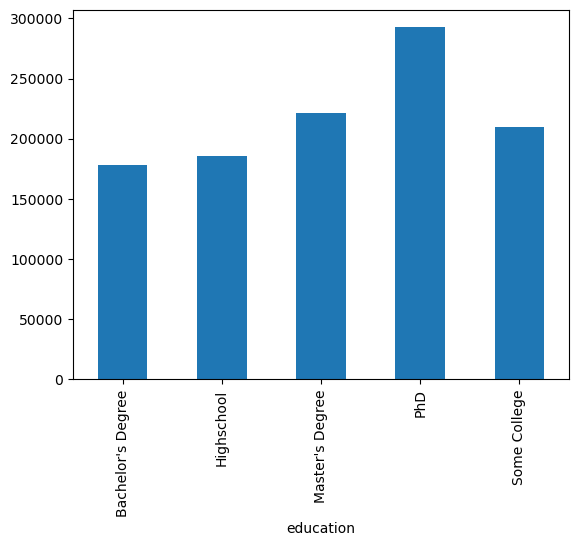

In [9]:
df_means_by_edu = df.groupby('education')['annualcomp'].mean()
df_means_by_edu.plot(kind="bar")

In [10]:
# split data into X and y
# shuffle
np.random.seed(11)
df = df.sample(frac=1)

X = df.drop("annualcomp", axis=1)
y = df["annualcomp"]

In [11]:
# make sure its all numerical for model fitting
# only if i didnt do it earlier

str_features = ['company', 'title', 'location', 'education', 'level', 'dmaid']

encoder = OneHotEncoder()

transformer = ColumnTransformer([('encoder', encoder, str_features)], remainder='passthrough')

transformed_X = transformer.fit_transform(X)

In [12]:
# split into training and test set

#np.random.seed(11)

#X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

In [13]:
#%%time
#model = RandomForestRegressor(n_jobs=-1, random_state=11)

#model.fit(X_train, y_train)

In [14]:
#model.score(X_train, y_train)

In [15]:
#model.score(X_test, y_test)

In [16]:
# split into training, test and validation
# idk when im supposed to do this hoenstly

# split into training, validation, and test
train_split_point = round(0.7*len(df))
valid_split_point = round(train_split_point + (0.15*len(df)))

X_train, y_train = transformed_X[:train_split_point], y[:train_split_point]
X_valid, y_valid = transformed_X[train_split_point:valid_split_point], y[train_split_point:valid_split_point]
X_test, y_test = transformed_X[valid_split_point:], y[valid_split_point:]

model = RandomForestRegressor(n_jobs=-1, random_state=11)
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=11)

In [17]:
model.score(X_train, y_train)

0.9459271983640846

In [18]:
# score function uses coefficient of determination
model.score(X_valid,y_valid)

0.6739368564539499

In [19]:
def evaluate_metrics(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training MSE": mean_squared_log_error(y_train, train_preds),
              "Validation MSE": mean_squared_log_error(y_valid, val_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_valid, val_preds)}
    return scores

In [20]:
scores = evaluate_metrics(model)
scores

{'Training MAE': 17046.664845558502,
 'Valid MAE': 42551.848460405694,
 'Training MSE': 0.013979404479538625,
 'Validation MSE': 0.0797804542575344,
 'Training R^2': 0.9459271983640846,
 'Valid R^2': 0.6739368564539499}

In [21]:
# maybe do a bracketed classifier after to better improve scores

In [29]:
# tune hyperparameters with RandomizedSearchCV
rs_grid = {'n_estimators': [50, 100, 150],
           'max_depth': [10, 30, 50],
           'max_features': ["sqrt", None],
           'min_samples_split': [2,4,6],
           }

rs_model = RandomizedSearchCV(RandomForestRegressor(random_state=11, n_jobs=-1), param_distributions=rs_grid, n_iter=10, cv=3, verbose=True, error_score='raise')

rs_model.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, error_score='raise',
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=11),
                   param_distributions={'max_depth': [10, 30, 50],
                                        'max_features': ['sqrt', None],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [50, 100, 150]},
                   verbose=True)

In [30]:
rs_model.best_params_

# old best params with 100 est and rs 33:
# n estimators 60
# min samples split 32
# min samples leaf 1
# max features none
# max depth 20
# 51%

# best params with 10 est and rs 33:
# n est 80
# min samp split 28
# max feat none
# max depth 25
# 53%

# best params with 10 est and rs 11:
# n est 40
# min samp split 12
# max feat none
# max depth 25
# 53%

# with full dataset with 10 iters 63%
# n est = 80,
# 20k samples max,
# max features none
# max depth 25

# with full dataset with 100 iters 63%
# n est = 50,
# 30k samples max,
# max features none
# max depth 25

## with full dataset with 10 iters 64%
# n est = 150,
# 20k samples max,
# max features none
# max depth 30
# 6 split

# with 100 iters 65%
#{'n_estimators': 190,
# 'min_samples_split': 2,
# 'max_samples': 20000,
# 'max_features': None,
# 'max_depth': 40}

# with 10 iters 67%
#{'n_estimators': 150,
# 'min_samples_split': 2,
# 'max_features': None,
# 'max_depth': 50}

{'n_estimators': 100,
 'min_samples_split': 2,
 'max_features': None,
 'max_depth': 50}

In [31]:
evaluate_metrics(rs_model)

{'Training MAE': 22136.913395572235,
 'Valid MAE': 43404.027167720924,
 'Training MSE': 0.027553397202362523,
 'Validation MSE': 0.0841490231458611,
 'Training R^2': 0.9284728632266984,
 'Valid R^2': 0.6662459109933117}

In [ ]:
# gridsearch cv for exhaustive
gs_grid = {'n_estimators': np.arange(30, 200, 10),
           'min_samples_split': np.arange(2, 32, 2),
           'min_samples_leaf': [1,2],
           'max_features': [None, 'sqrt'],
           'max_depth': np.arange(20, 100, 5)}

gs_model = GridSearchCV(RandomForestRegressor(random_state=11, n_jobs=-1), param_grid=gs_grid, cv=3, verbose=True, error_score='raise')

gs_model.fit(X_train, y_train)

Fitting 3 folds for each of 16320 candidates, totalling 48960 fits


In [ ]:
gs_model.best_params_

In [ ]:
evaluate_metrics(gs_model)

In [ ]:
# compare metrics